Análise de Produção de Água Mineral

Este notebook apresenta a **descrição do dataset** e uma **exploração estatística** inicial
usando pandas, numpy, matplotlib e seaborn.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descrição do Dataset


Nome do Dataset: AMB - Água mineral
Link original: https://dados.gov.br 
Órgão responsável: Agência Nacional de Mineração

Este dataset contém informações sobre a produção de água mineral em diferentes períodos e localidades, com o objetivo de monitorar a disponibilidade, produção e estatísticas relacionadas ao setor.

In [2]:
# Estrutura
df = pd.read_csv("Producao_Agua - Agua_Mineral_Producao.csv")
print(f"Número de registros: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

Número de registros: 405
Número de colunas: 17


### Variáveis importantes:
- Ano: ano de referência dos dados
- UF: Unidade da Federação (estado)
- Quantidade/Produção: valores de produção de água em m³ ou litros
- Valor: Quantidade em R$ de água vendida por tipo
- Empresa ou categoria: identificação da origem dos dados


In [3]:
# Visualização rápida do dataset
print("\nAmostra de dados:")
df.head()



Amostra de dados:


,Ano base,UF,Classe Substancia Mineral,Substancia Mineral,Quantidade (litros) Garrafao,Quantidade (litros) Garrafa Plastica,Quantidade (litros) Garrafa de Vidro,Quantidade (litros) Copo,Quantidade (litros) Outras Embalagens,Valor (R$) Garrafao,Valor (R$) Garrafa Plastica,Valor (R$) Garrafa de Vidro,Valor (R$) Copo,Valor (R$) Outras Embalagens,Quantidade (litros) Composiçao Produtos Industrializados,Valor (R$) Composiçao Produtos Industrializados,Unidade de Medida
0,2010,AC,Água,Água,38315345,1309740,0,0,0,"3023041,51","893805,05",0,0,0,0,0,l
1,2010,AL,Água,Água,114247245,"40200141,39",0,"6278109,2",0,"17827642,93","32721765,87",0,"3546006,93",0,0,0,l
2,2010,AM,Água,Água,123936416,"19768794,2",0,"297157,2",29610990,"14123668,35","18215888,9",0,"348790,9","8729111,7",32588811,"13404,47",l
3,2010,AP,Água,Água,9218676,1132581,0,"1981246,72",32586,"608503,83","93490,15",0,"129542,9","2172,4",0,0,l
4,2010,BA,Água,Água,367148670,"73497479,32",0,9850320,0,"29279716,74","61025058,46",0,"5329528,41",0,1086434191,"24465852,29",l


# 3. EXPLORAÇÃO ESTATÍSTICA

In [4]:
# Verificação de tipos e valores ausentes
print("Tipos de dados:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())

Tipos de dados:
Ano base                                                     int64
UF                                                          object
Classe Substancia Mineral                                   object
Substancia Mineral                                          object
Quantidade (litros) Garrafao                                object
Quantidade (litros) Garrafa Plastica                        object
Quantidade (litros) Garrafa de Vidro                        object
Quantidade (litros) Copo                                    object
Quantidade (litros) Outras Embalagens                       object
Valor (R$) Garrafao                                         object
Valor (R$) Garrafa Plastica                                 object
Valor (R$) Garrafa de Vidro                                 object
Valor (R$) Copo                                             object
Valor (R$) Outras Embalagens                                object
Quantidade (litros) Composiçao Produtos Indust

In [5]:
for col in range (4, 16):
    name_column = df.columns[col]
    df[name_column] = pd.to_numeric(df[name_column].apply(lambda x: str(x).replace(',', '.')), errors='coerce')

In [6]:
print("Tipos de dados:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())

Tipos de dados:
Ano base                                                      int64
UF                                                           object
Classe Substancia Mineral                                    object
Substancia Mineral                                           object
Quantidade (litros) Garrafao                                float64
Quantidade (litros) Garrafa Plastica                        float64
Quantidade (litros) Garrafa de Vidro                        float64
Quantidade (litros) Copo                                    float64
Quantidade (litros) Outras Embalagens                       float64
Valor (R$) Garrafao                                         float64
Valor (R$) Garrafa Plastica                                 float64
Valor (R$) Garrafa de Vidro                                 float64
Valor (R$) Copo                                             float64
Valor (R$) Outras Embalagens                                float64
Quantidade (litros) Composiçao P

In [7]:
# Selecionar colunas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
print(num_cols)
# Estatísticas descritivas básicas
print("\nEstatísticas descritivas:")
print(df[num_cols].describe())

Index(['Ano base', 'Quantidade (litros) Garrafao',
       'Quantidade (litros) Garrafa Plastica',
       'Quantidade (litros) Garrafa de Vidro', 'Quantidade (litros) Copo',
       'Quantidade (litros) Outras Embalagens', 'Valor (R$) Garrafao',
       'Valor (R$) Garrafa Plastica', 'Valor (R$) Garrafa de Vidro',
       'Valor (R$) Copo', 'Valor (R$) Outras Embalagens',
       'Quantidade (litros) Composiçao Produtos Industrializados',
       'Valor (R$) Composiçao Produtos Industrializados'],
      dtype='object')

Estatísticas descritivas:
          Ano base  Quantidade (litros) Garrafao  \
count   405.000000                  4.050000e+02   
mean   2017.000000                  2.667502e+08   
std       4.325838                  3.164784e+08   
min    2010.000000                  3.306611e+06   
25%    2013.000000                  6.188589e+07   
50%    2017.000000                  1.769466e+08   
75%    2021.000000                  3.191040e+08   
max    2024.000000                  2.

In [9]:
# Moda, variância, desvio padrão
for col in num_cols:
    print(f"\n{col}")
    print(f"Média: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")
    print(f"Moda: {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")
    print(f"Mínimo: {df[col].min()}")
    print(f"Máximo: {df[col].max()}")
    print(f"Desvio padrão: {df[col].std():.2f}")
    print(f"Variância: {df[col].var():.2f}")
    print(f"Quartis:\n{df[col].quantile([0.25,0.5,0.75])}")
    print(f"IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")



Ano base
Média: 2017.00
Mediana: 2017.00
Moda: 2010
Mínimo: 2010
Máximo: 2024
Desvio padrão: 4.33
Variância: 18.71
Quartis:
0.25    2013.0
0.50    2017.0
0.75    2021.0
Name: Ano base, dtype: float64
IQR: 8.00

Quantidade (litros) Garrafao
Média: 266750248.82
Mediana: 176946583.20
Moda: 3306611.0
Mínimo: 3306611.0
Máximo: 2280906592.0
Desvio padrão: 316478376.26
Variância: 100158562642220608.00
Quartis:
0.25     61885893.8
0.50    176946583.2
0.75    319103993.0
Name: Quantidade (litros) Garrafao, dtype: float64
IQR: 257218099.20

Quantidade (litros) Garrafa Plastica
Média: 93160126.14
Mediana: 31763608.48
Moda: 47968.0
Mínimo: 47968.0
Máximo: 4081037301.0
Desvio padrão: 260377850.17
Variância: 67796624858378456.00
Quartis:
0.25    10634592.80
0.50    31763608.48
0.75    79429957.50
Name: Quantidade (litros) Garrafa Plastica, dtype: float64
IQR: 68795364.70

Quantidade (litros) Garrafa de Vidro
Média: 466528.68
Mediana: 0.00
Moda: 0.0
Mínimo: 0.0
Máximo: 23388192.61
Desvio padrão: 199

# VISUALIZAÇÕES

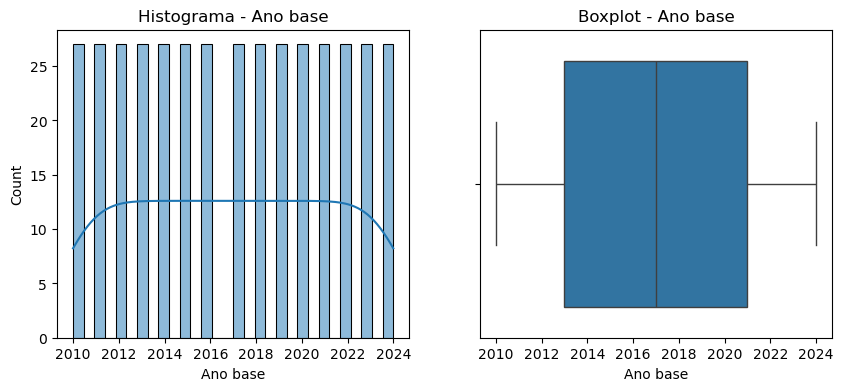

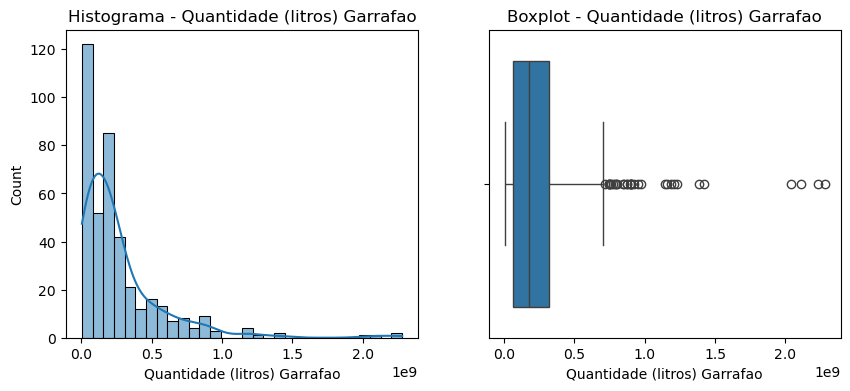

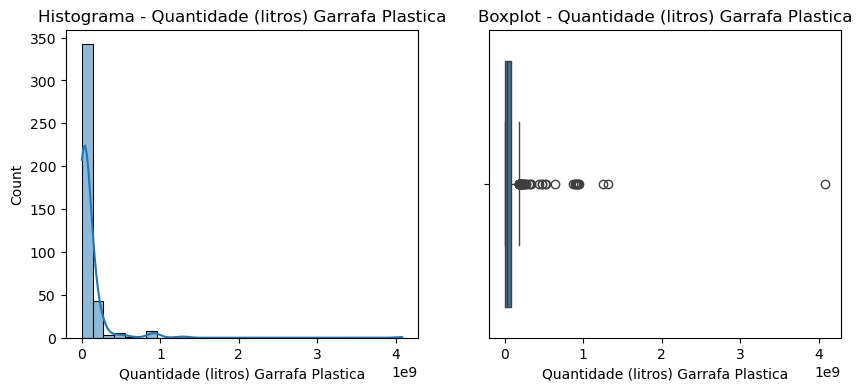

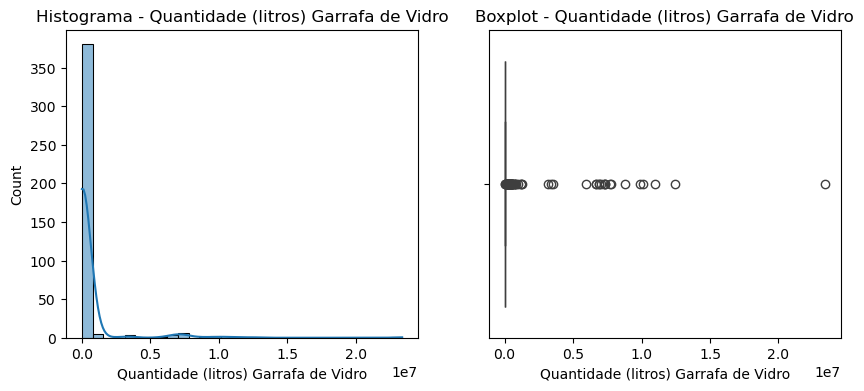

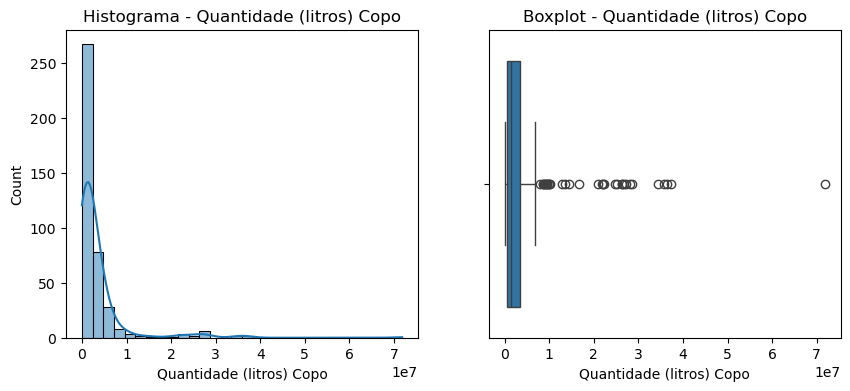

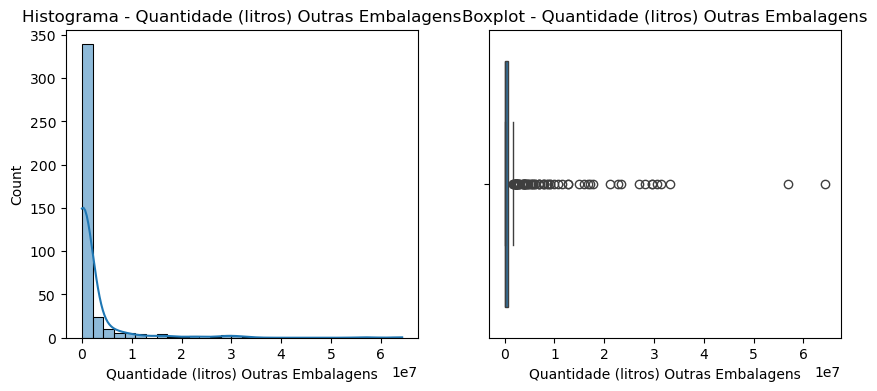

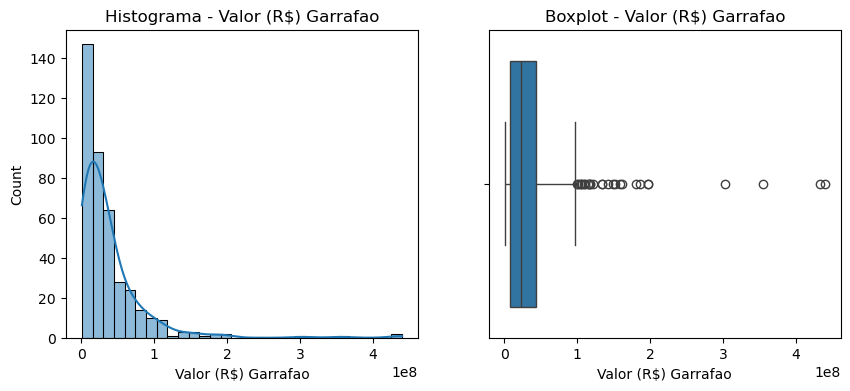

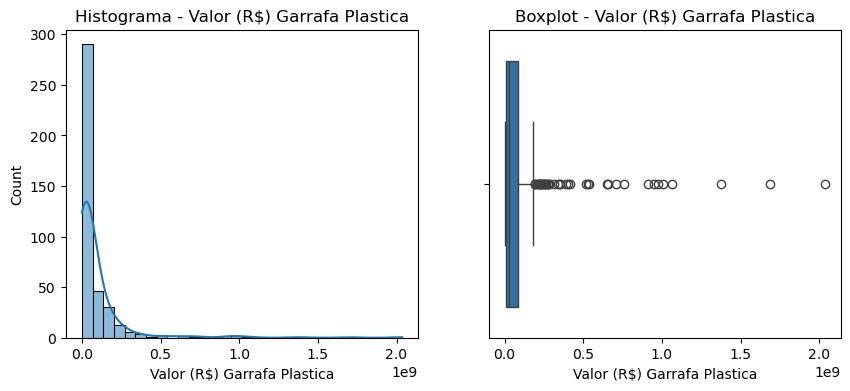

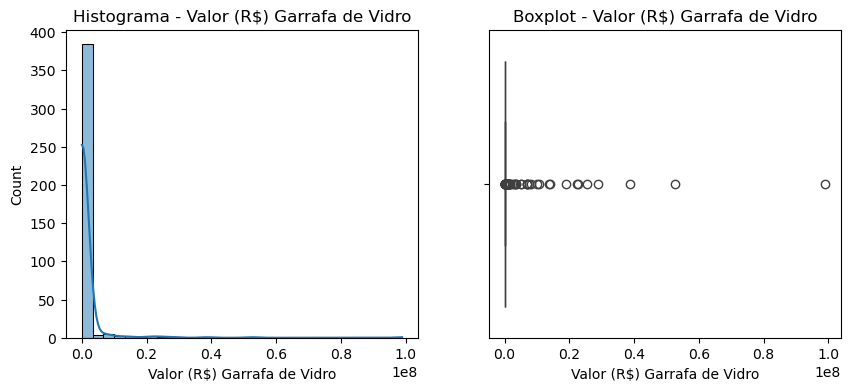

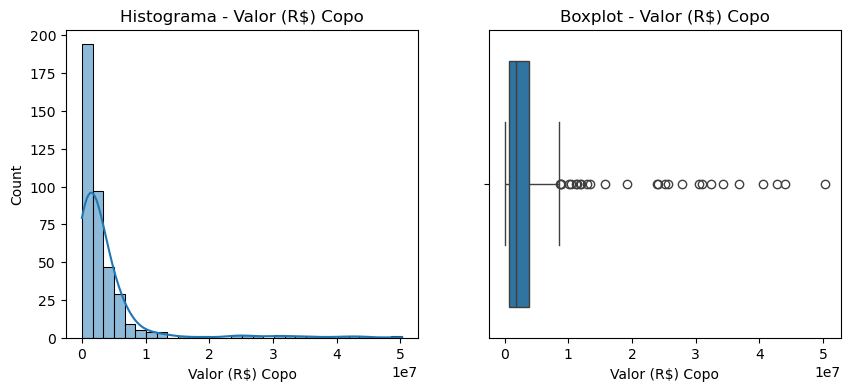

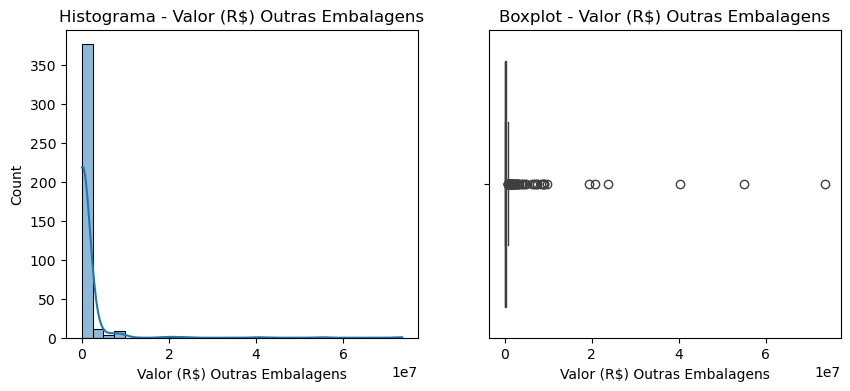

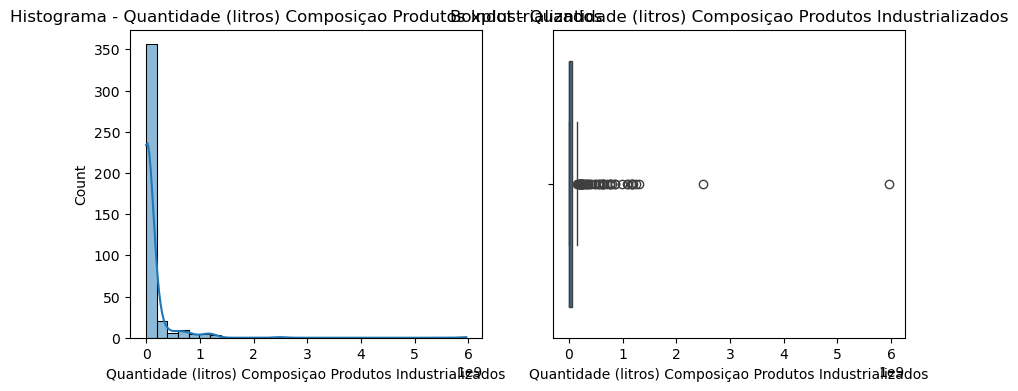

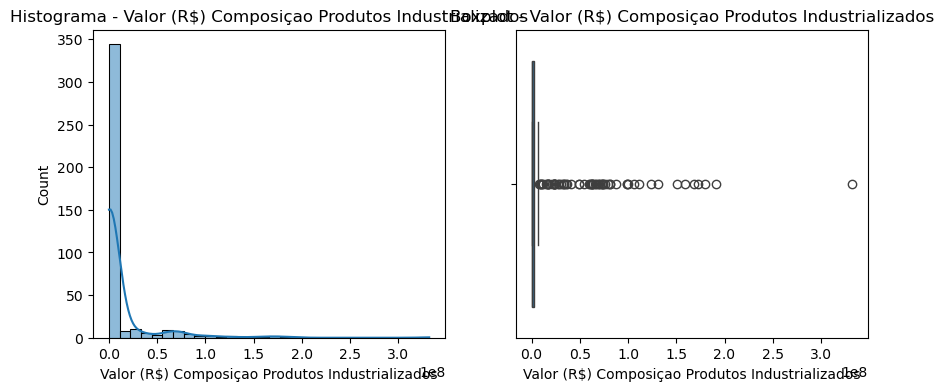

In [10]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Histograma - {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

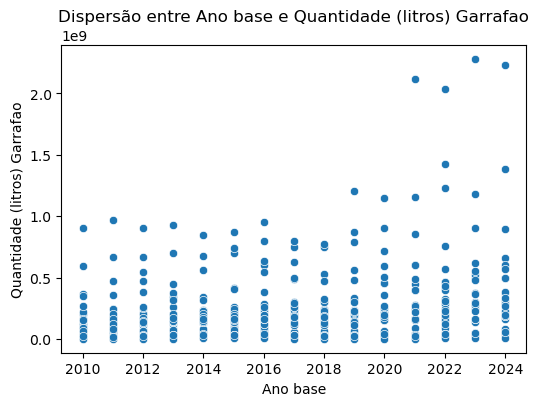

In [11]:
# Gráfico de dispersão (se houver mais de uma variável numérica)
if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=num_cols[0], y=num_cols[1])
    plt.title(f"Dispersão entre {num_cols[0]} e {num_cols[1]}")
    plt.show()

# COMENTÁRIOS

Comentários preliminares:
- É possível identificar a distribuição dos valores de produção por meio de histogramas.
- O boxplot ajuda a identificar outliers (valores muito acima ou abaixo do esperado).
- A estatística descritiva mostra média, mediana e moda: diferenças entre elas podem indicar assimetria na distribuição.
- A análise do IQR mostra a dispersão central e ajuda a entender a variabilidade.
- A dispersão entre duas variáveis numéricas permite verificar correlações ou agrupamentos.